<a href="https://colab.research.google.com/github/muskanalirizvi/Algorithms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df['State'].value_counts()


,count
State,
New York,17
California,17
Florida,16


In [ ]:
import matplotlib.pyplot as plt

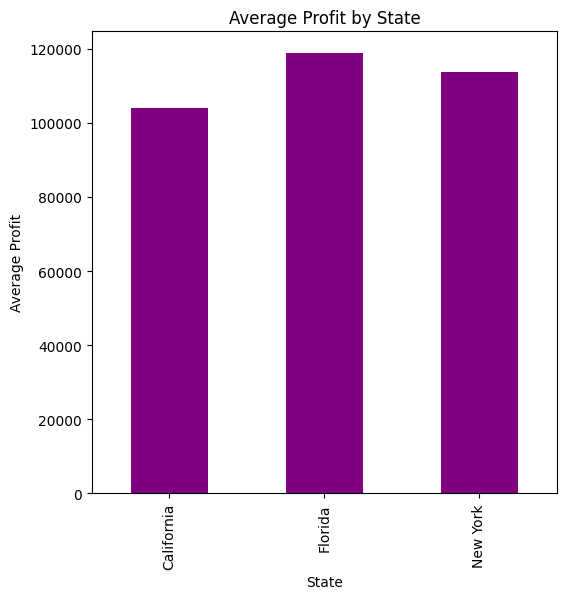

In [ ]:
df_grouped = df.groupby('State')['Profit'].mean()

plt.figure(figsize=(6, 6))
df_grouped.plot(kind='bar', color='purple')
plt.title('Average Profit by State')
plt.xlabel('State')
plt.ylabel('Average Profit')
plt.show()


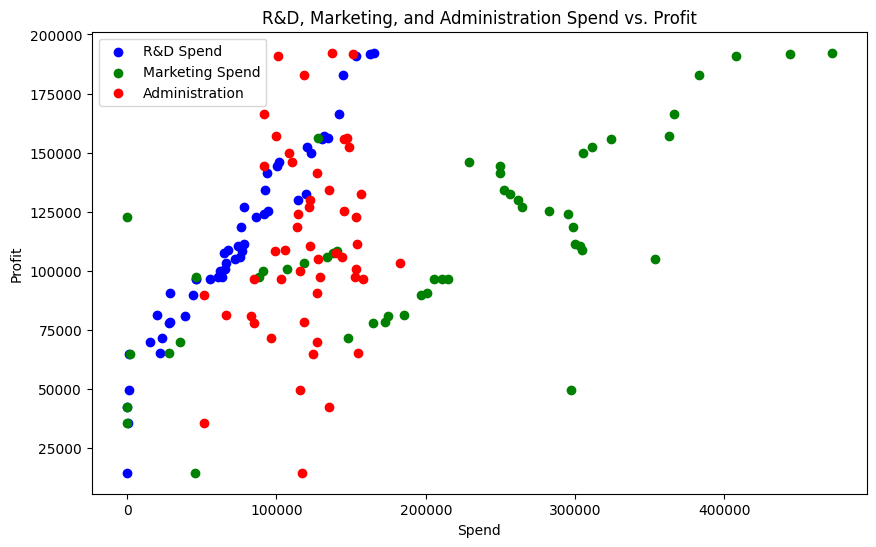

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['R&D Spend'], df['Profit'], color='blue', label='R&D Spend')
plt.scatter(df['Marketing Spend'], df['Profit'], color='green', label='Marketing Spend')
plt.scatter(df['Administration'], df['Profit'], color='red', label='Administration')
plt.title('R&D, Marketing, and Administration Spend vs. Profit')
plt.xlabel('Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()

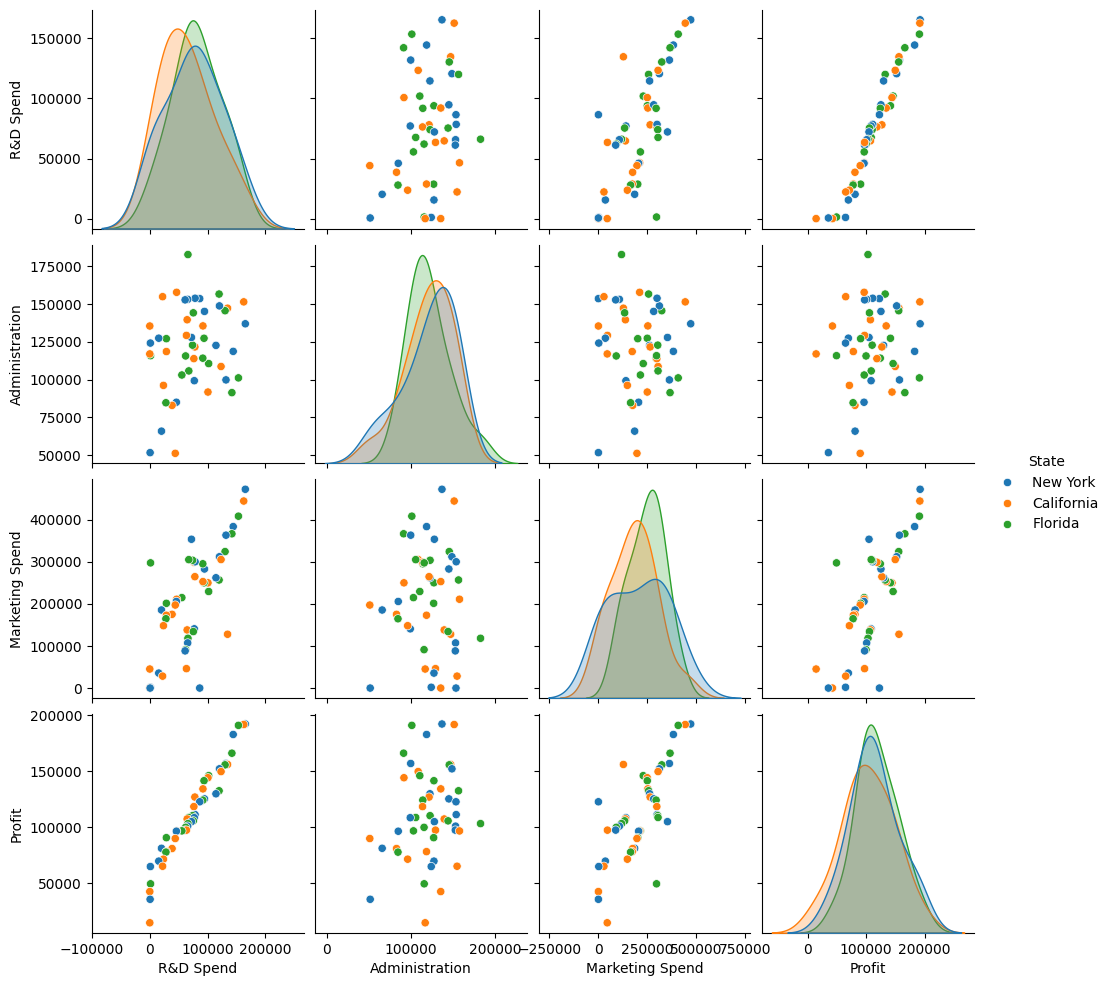

In [ ]:
import seaborn as sns

sns.pairplot(df, vars=['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], hue='State')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output= False)
encoded_state = encoder.fit_transform(df[['State']])
encoded_df = pd.DataFrame(encoded_state, columns=encoder.get_feature_names_out(['State']))
df = pd.concat([df.drop('State', axis=1), encoded_df], axis=1)

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
c = ['R&D Spend', 'Administration', 'Marketing Spend']
df[c] = scaler.fit_transform(df[c])

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,2.016411,0.560753,2.153943,192261.83,0.0,1.0
1,1.955860,1.082807,1.923600,191792.06,0.0,0.0
2,1.754364,-0.728257,1.626528,191050.39,1.0,0.0
3,1.554784,-0.096365,1.422210,182901.99,0.0,1.0
4,1.504937,-1.079919,1.281528,166187.94,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['Profit'], axis = 1), df['Profit'], test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

R2 = r2_score(y_test, y_pred)

In [ ]:
print('r2_score: ', R2)

r2_score:  0.9864405206684835


In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
import numpy as np

rmse = np.sqrt(mse)
rmse

4476.818299407066

In [ ]:
residual = y_test - y_pred

<ipython-input-174-d3fa120a5829>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, kde=True)


<Axes: xlabel='Profit', ylabel='Density'>

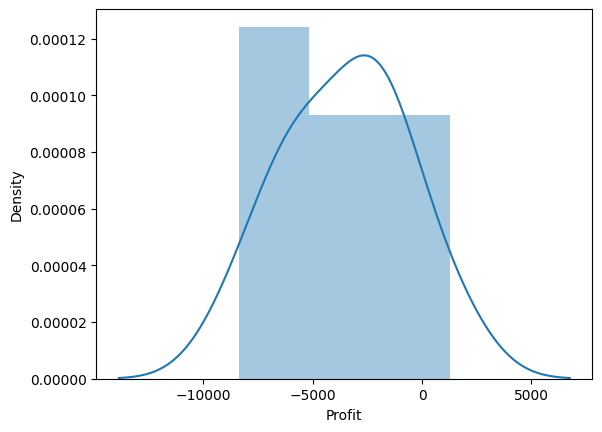

In [ ]:
sns.distplot(residual, kde=True)

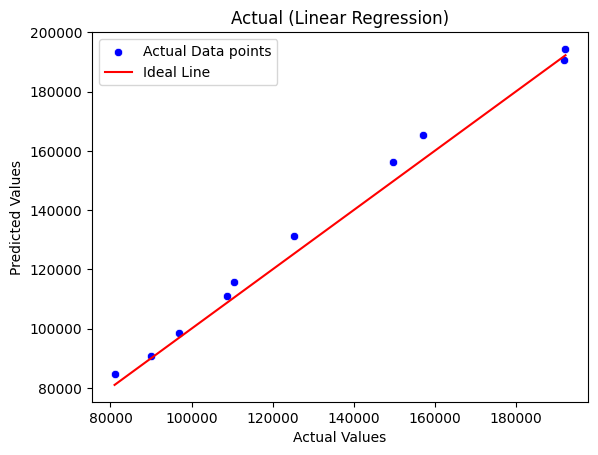

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()